In [38]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [40]:
# to check if there is any null value
df.isna().sum()

#so there is no null or na value 
# Now we see the summary of the dataset 
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [41]:
# Unique values of objects
print(df['Ship Mode'].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())
# print(df["City"].unique())



['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [42]:
# Checking if there is any Duplicate entries in the dataset 

df.duplicated().sum()

# So there are 17 duplicate rows that are present in the dataset
# Lets drop the duplicates 

df.drop_duplicates(inplace=True)
# df.shape

# lets remove some unwanted coloumns such as country and postal code
df.drop(columns=['Postal Code','Country'],axis=1,inplace=True)

df.shape

(9977, 11)

In [43]:
# Lets analyse the data with the sales per region

region_wise_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(10)
region_wise_sales = region_wise_sales.reset_index()
region_wise_sales

,Region,Sales
0,West,725255.6365
1,East,678435.1960
2,Central,500782.8528
3,South,391721.9050


<Axes: xlabel='Region'>

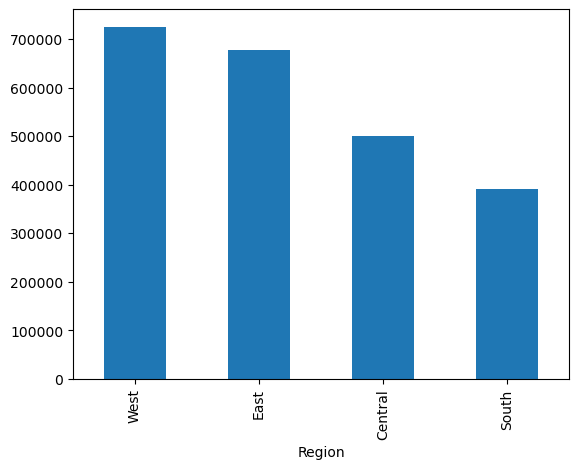

In [44]:
# Now Showing bar graph of sales Vs regions
df.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot.bar()

In [45]:
# Analyse state wise revenu
state_wise_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_wise_sales = state_wise_sales.reset_index()
state_wise_sales

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620
5,Florida,89473.7080
6,Illinois,80162.5370
7,Ohio,77976.7640
8,Michigan,75879.6440
9,Virginia,70636.7200


<Axes: xlabel='Sales', ylabel='State'>

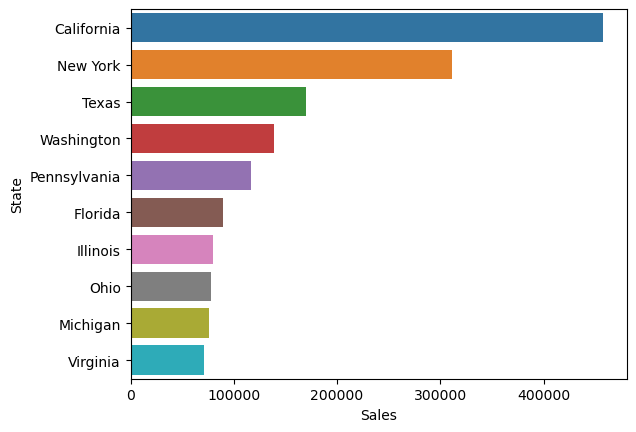

In [46]:
#Now showing State wise Sales using Bar plot 
# df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).plot.bar()

sns.barplot(data=state_wise_sales,x='Sales',y='State')


In [47]:
# Analyse City wise Sales 
city_wise_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_wise_sales = city_wise_sales.reset_index()
city_wise_sales.head(10)

,City,Sales
0,New York City,256319.0410
1,Los Angeles,175831.9010
2,Seattle,119460.2820
3,San Francisco,112577.1720
4,Philadelphia,109061.4610
5,Houston,64441.2564
6,Chicago,48535.9770
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Seattle'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Philadelphia'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Jacksonville'),
  Text(9, 0, 'Springfield')])

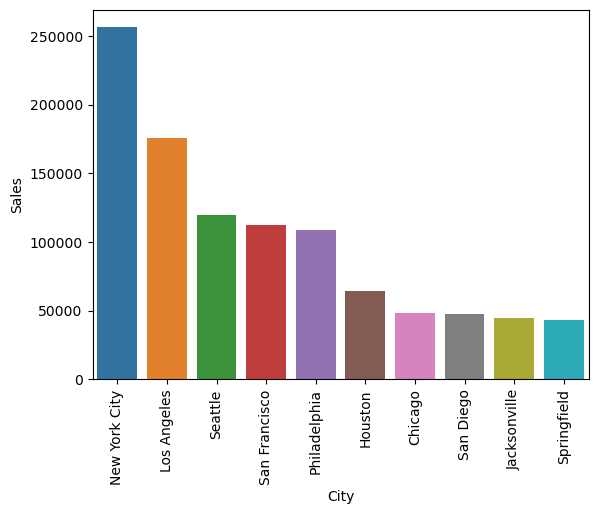

In [59]:
# Showing the analysis on chart 
sns.barplot(data=city_wise_sales.head(10), x='City', y='Sales')
plt.xticks(rotation='vertical')

In [49]:
# Segment wise sales
top_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
top_segment = top_segment.reset_index()

#Generating the labels which will show the sales value in K figur
top_segment['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top_segment.Sales]
# print(top_segment)

top_segment


,Segment,Sales,SalesK
0,Consumer,1.160833e+06,$ 1161 K
1,Corporate,7.060701e+05,$ 706 K
2,Home Office,4.292927e+05,$ 429 K


In [50]:
# Category wise sales
top_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_category = top_category.reset_index()

#Generating the labels which will show the sales value in K figure
top_category['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top_category.Sales]
# print(top_category)
top_category

,Category,Sales,SalesK
0,Technology,836154.0330,$ 836 K
1,Furniture,741306.3133,$ 741 K
2,Office Supplies,718735.2440,$ 719 K


C:\Users\shrey\AppData\Local\Temp\ipykernel_4408\1741226225.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=8, linecolor='white')


'\nWe can see that sales and discount are related\nsales is fairly related  to the profit and \ndiscount is negitively related to profit\n\n'

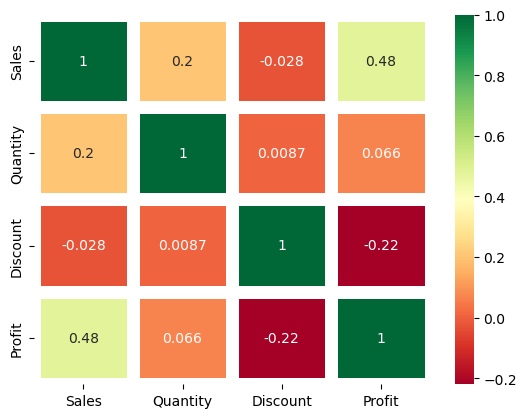

In [69]:
# NOW Analysing the data based on profit

sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=8, linecolor='white')

'''
We can see that sales and discount are related
sales is fairly related  to the profit and 
discount is negitively related to profit

which means higher sales and lesser discounts leads to more profit
'''

'\nSo from the graph we can say that \n1. Standard Class is mostly used for shipment\n2. Comsumer Segment conumer are buying more items\n3. Superstore is more in west and least in south\n4. Office Supplies category has most number of products sold\n5. Subcategory Binders & paper have highest sales\n6. people mostly buy quantity of 2 or 3\n\n'

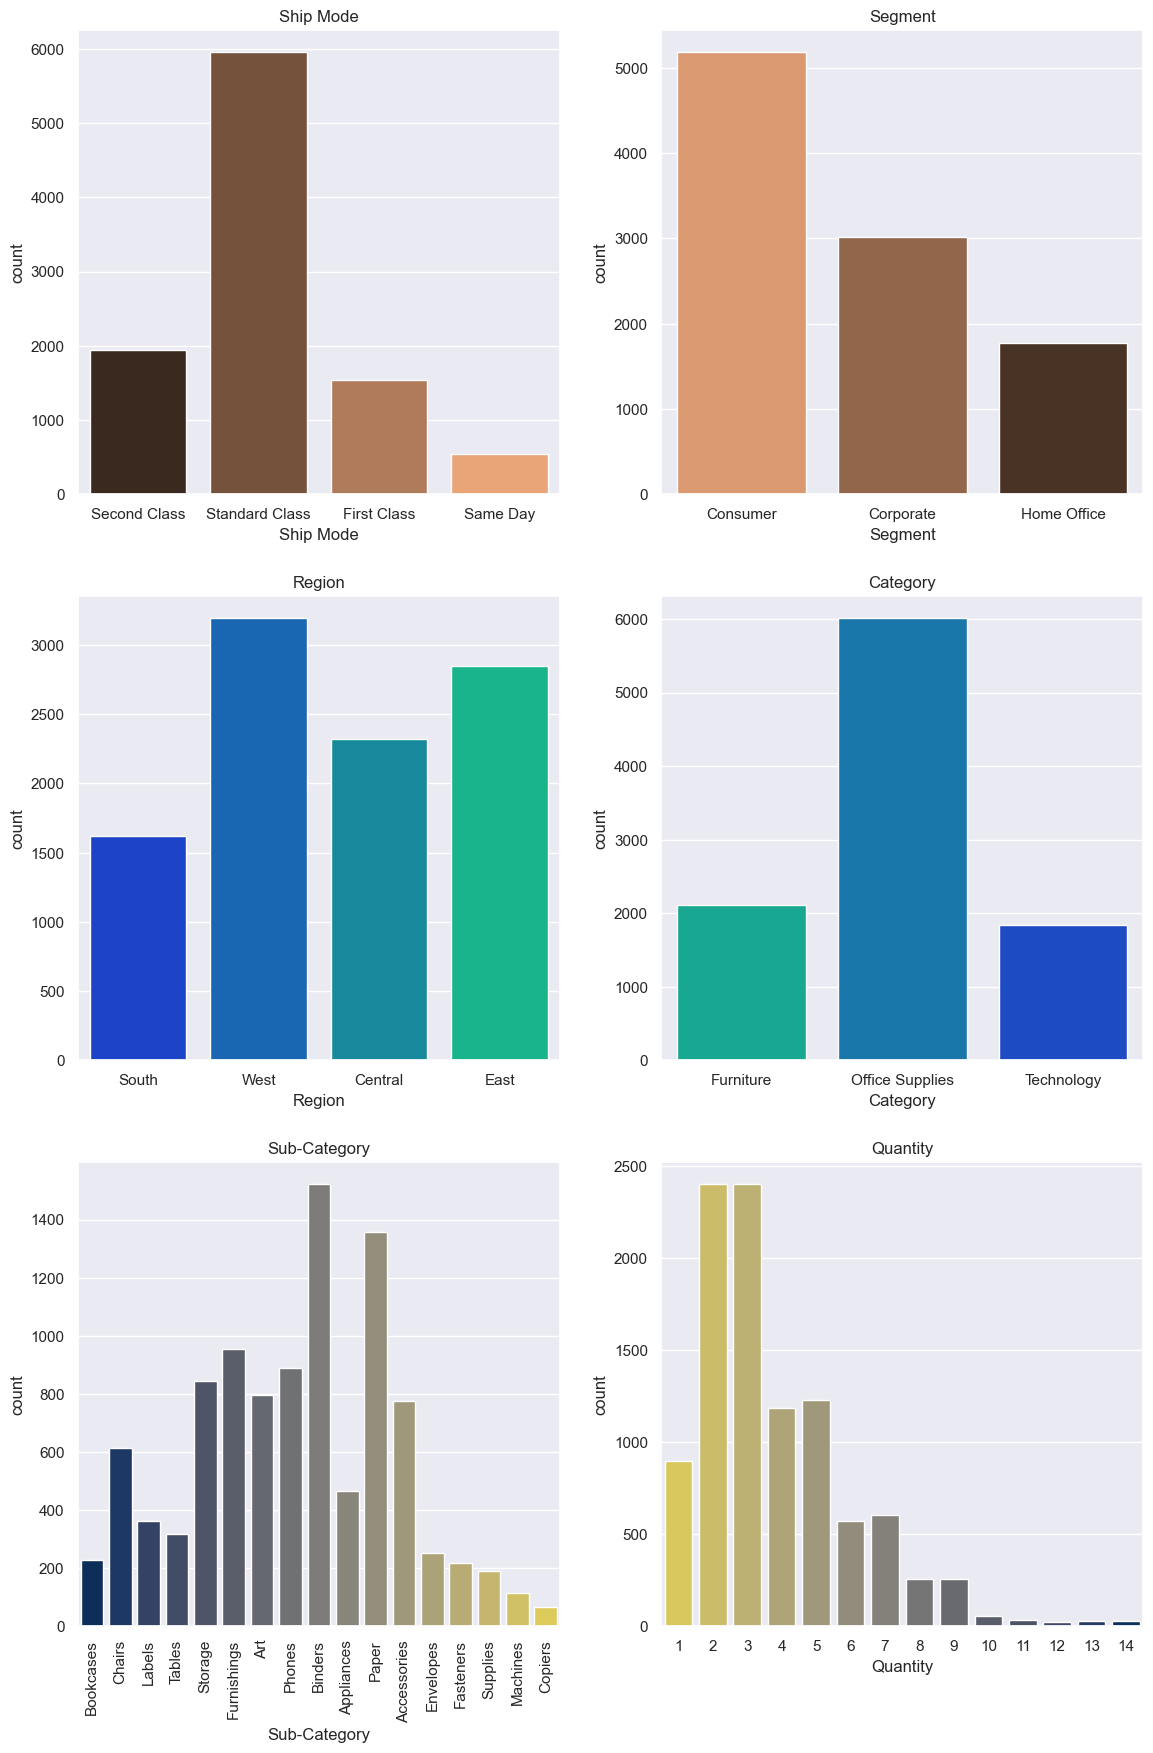

In [99]:
fig, axes = plt.subplots(3,2, figsize=(12,18))
sns.set_theme(style='darkgrid')

axes[0,0].set_title('Ship Mode')
axes[0,1].set_title('Segment')
axes[1,0].set_title('Region')
axes[1,1].set_title('Category')
axes[2,0].set_title('Sub-Category')
axes[2,1].set_title('Quantity')

sns.countplot(x = df['Ship Mode'], palette='copper', orient='h', ax=axes[0,0])
sns.countplot(x = df['Segment'], palette='copper_r', orient='h', ax=axes[0,1])
sns.countplot(x = df['Region'], palette='winter', orient='h', ax=axes[1,0])
sns.countplot(x = df['Category'], palette='winter_r', orient='h', ax=axes[1,1])
sns.countplot(x = df['Sub-Category'], palette='cividis', orient='h', ax=axes[2,0])
axes[2,0].set_xticklabels(list(df['Sub-Category'].unique()), rotation = 90)

sns.countplot(x = df['Quantity'], palette='cividis_r', orient='h', ax=axes[2,1])
plt.tight_layout(pad=2)

'''
So from the graph we can say that 
1. Standard Class is mostly used for shipment
2. Comsumer Segment conumer are buying more items
3. Superstore is more in west and least in south
4. Office Supplies category has most number of products sold
5. Subcategory Binders & paper have highest sales
6. people mostly buy quantity of 2 or 3

'''

'\nSo we can sy that Standard class ship-mode is more preferred\n\n'

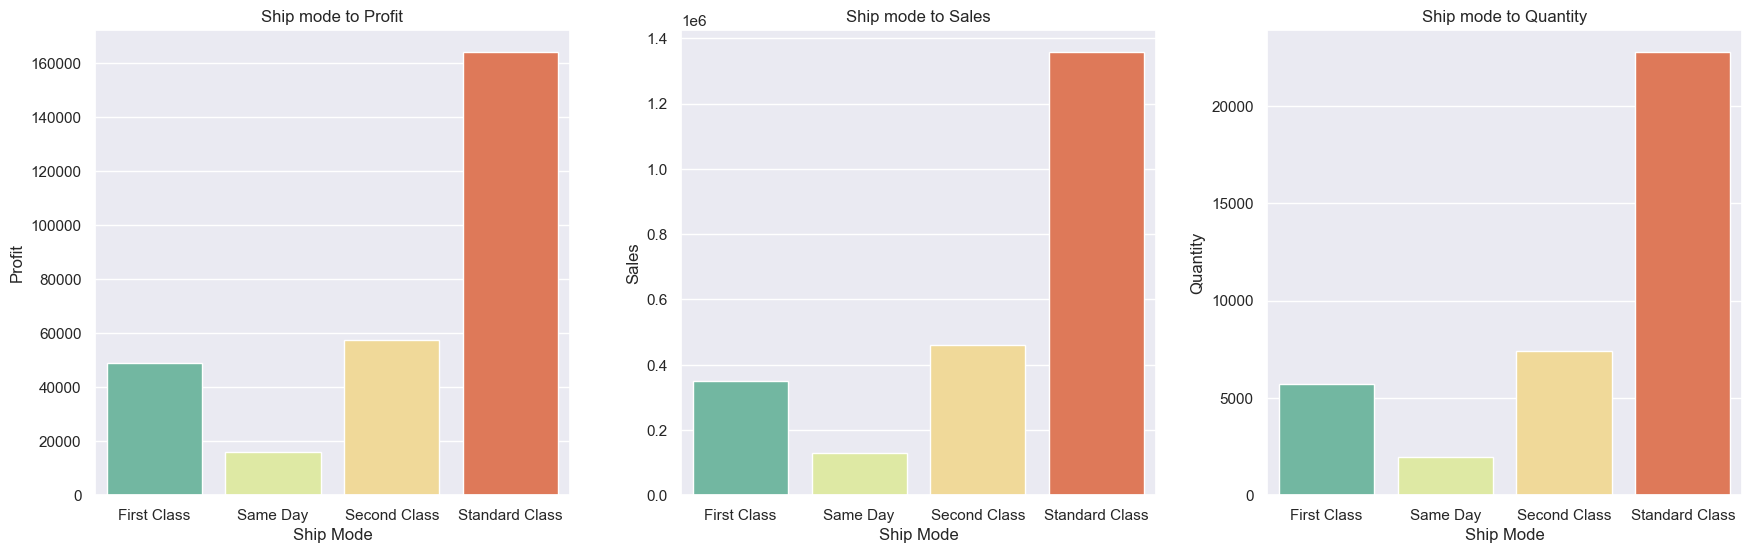

In [111]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Profit")
axes[1].set_title("Ship mode to Sales")
axes[2].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index, y=ship_df['Profit'], data= ship_df, palette = 'Spectral_r', ax = axes[0])

sns.barplot(x=ship_df.index, y=ship_df['Sales'], data= ship_df, palette = 'Spectral_r', ax = axes[1])

sns.barplot(x=ship_df.index, y=ship_df['Quantity'], data= ship_df, palette = 'Spectral_r', ax = axes[2])

plt.tight_layout(pad=2)

'''
So we can sy that Standard class ship-mode is more preferred

'''

In [107]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134007.4413,1.160833e+06,19497
Corporate,91954.9798,7.060701e+05,11591
Home Office,60279.0015,4.292927e+05,6732


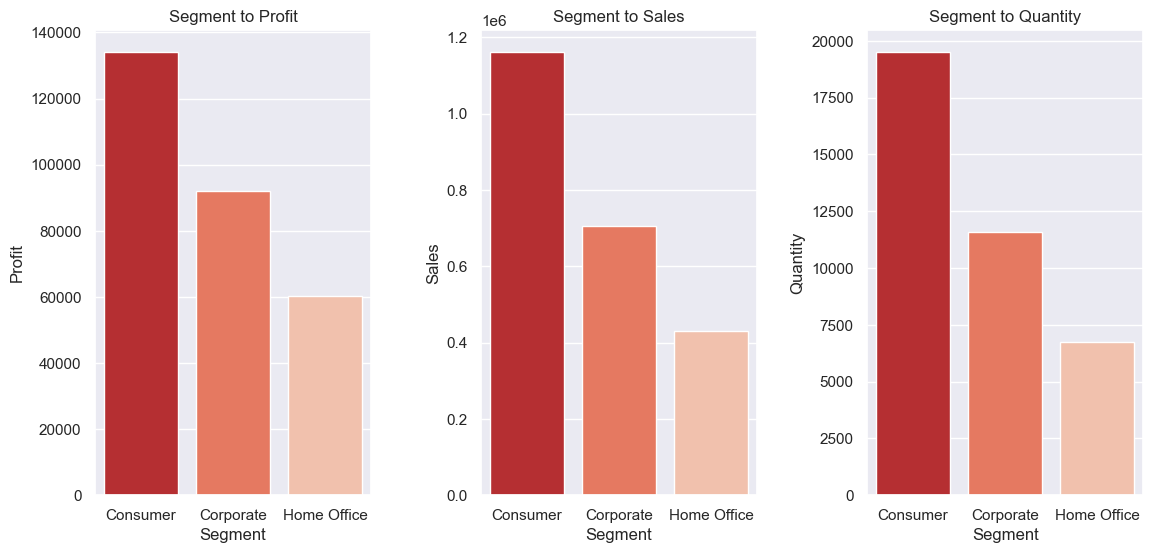

In [108]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
           y=segment_df['Profit'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[0])

sns.barplot(x=segment_df.index,
           y=segment_df['Sales'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[1])

sns.barplot(x=segment_df.index,
           y=segment_df['Quantity'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[2])

plt.tight_layout(pad=2)

'''
So from this we can say that Consumer segment is more Profitable.

'''

In [121]:
region_df = pd.DataFrame(df.groupby('Region')[['Profit','Sales','Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39655.8752,500782.8528,8768
East,91506.3092,678435.1960,10609
South,46749.4303,391721.9050,6209
West,108329.8079,725255.6365,12234


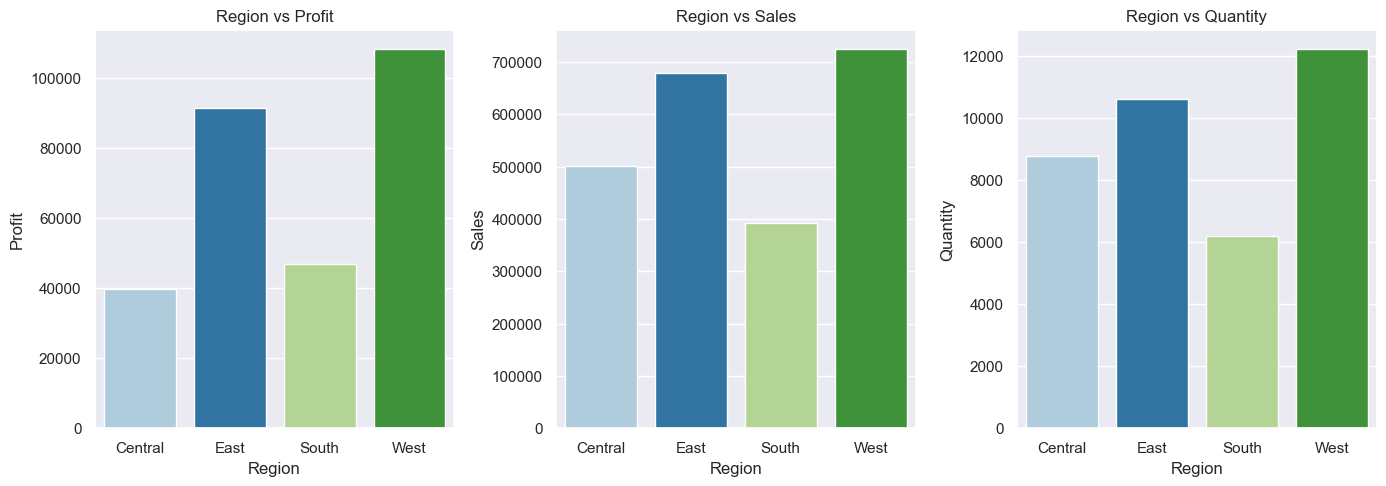

In [126]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")
axes[2].set_title("Region vs Quantity")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

sns.barplot(x=region_df.index,
           y='Quantity',
           data=region_df,
           palette='Paired',
           ax=axes[2])

plt.tight_layout(pad=1)


'''
Here we can say that West and East  Region show more profit with great Sales and item sold Quanti
'''

In [127]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


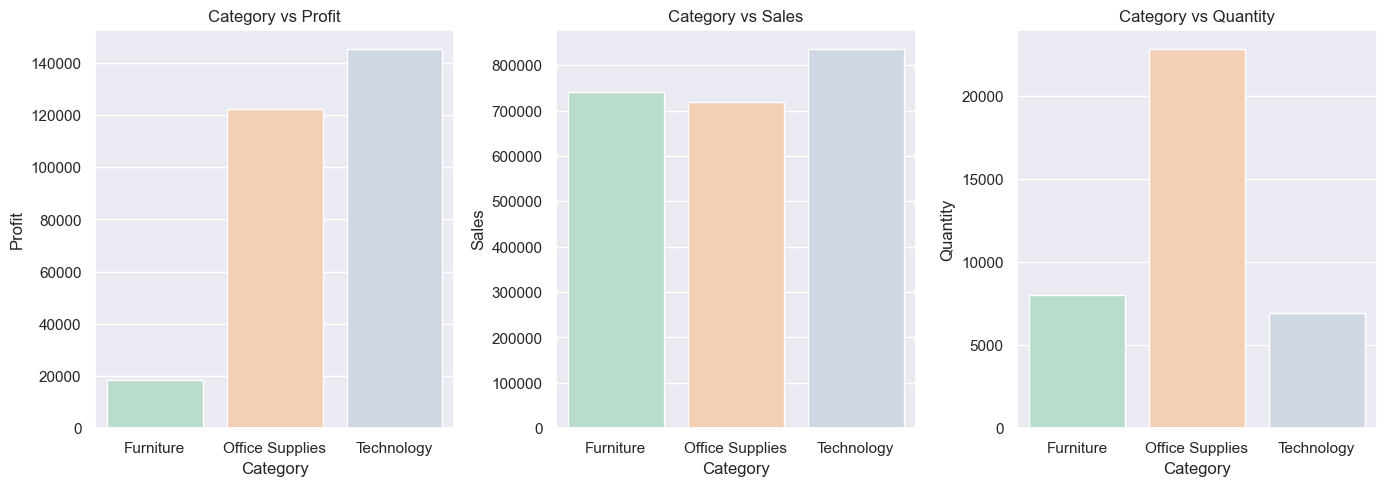

In [128]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1)

'''
So we can say that inspite of having low Quanity to sell the anount of profit generated in more that any other category
Hence we should focous on the Technology sale
'''

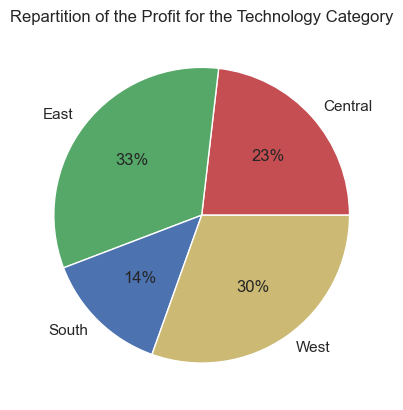

In [135]:
A = df[df['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = 'rgby', autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

'''
So East and west region shows more profit as compared to others
'''

In [138]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6524.6118,27107.0320,2996
Binders,30228.0003,203409.1690,5971
Bookcases,-3472.5560,114879.9963,868
Chairs,26567.1278,327777.7610,2351
Copiers,55617.8249,149528.0300,234
Envelopes,6964.1767,16476.4020,906
Fasteners,949.5182,3024.2800,914


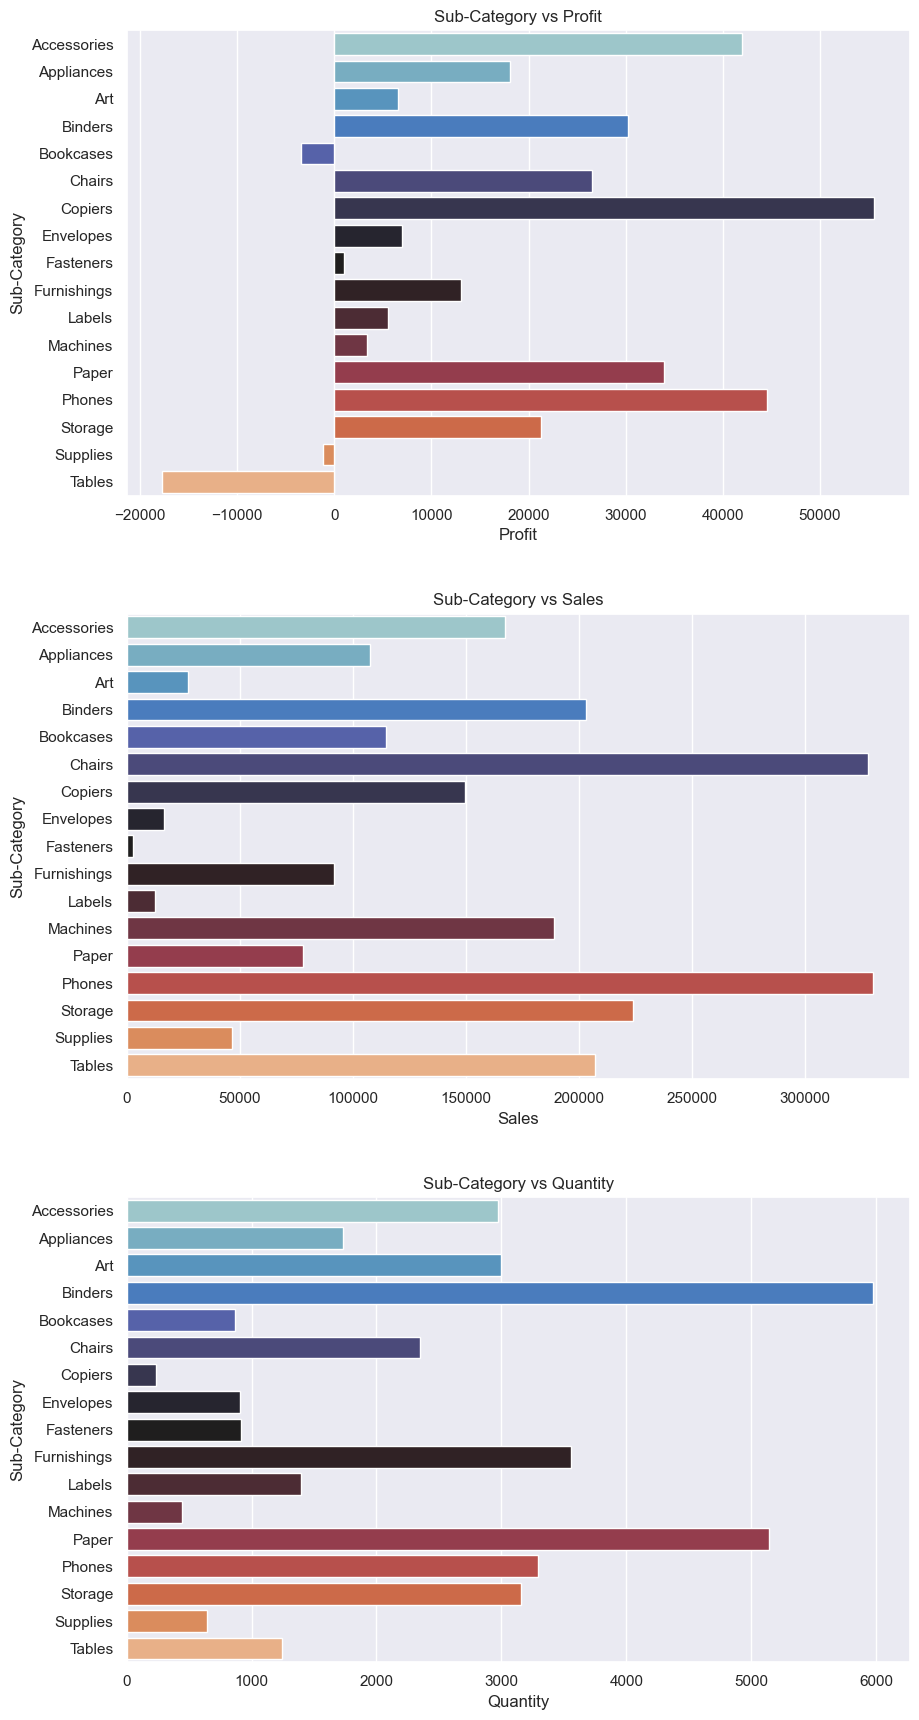

In [139]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='icefire',
           ax=axes[2])

plt.tight_layout(pad=3)

'''
With analyzing these graphs, we may say that copiers, accessories and phones have more sales and profit.
'''

<Axes: xlabel='Sub-Category'>

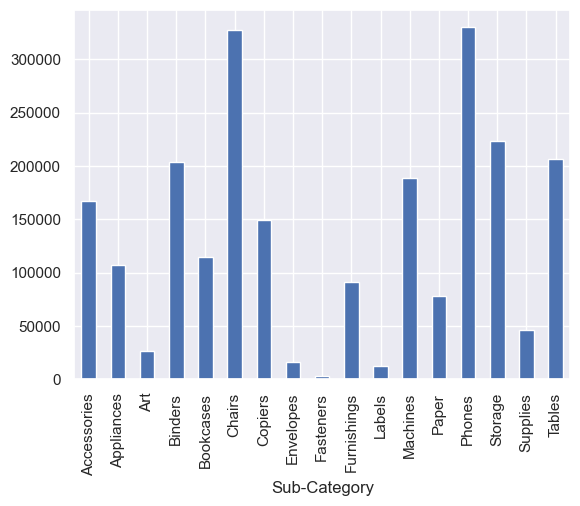

In [76]:
df.groupby('Sub-Category')['Sales'].sum().plot.bar()

In [52]:
# Quantity of item sold in each 

sub_category_item_sold = df['Sub-Category'].value_counts()
sub_category_item_sold = pd.DataFrame(sub_category_item_sold)
sub_category_item_sold.rename(columns= {'Sub-Category':'quantity'},inplace=True)
sub_category_item_sold.index.name = 'Sub-Category items'
sub_category_item_sold

# sub_category_item_sold.reset_index().rename(columns= {'item':'Quantity Sold'},inplace=True)
# sub_category_item_sold.index.name = 'Sub-Category'
# sub_category_item_sold = pd.DataFrame(sub_category_item_sold)
# sub_category_item_sold.head()


,quantity
Sub-Category items,
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Binders'),
  Text(1, 0, 'Paper'),
  Text(2, 0, 'Furnishings'),
  Text(3, 0, 'Phones'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Art'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Chairs'),
  Text(8, 0, 'Appliances'),
  Text(9, 0, 'Labels'),
  Text(10, 0, 'Tables'),
  Text(11, 0, 'Envelopes'),
  Text(12, 0, 'Bookcases'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

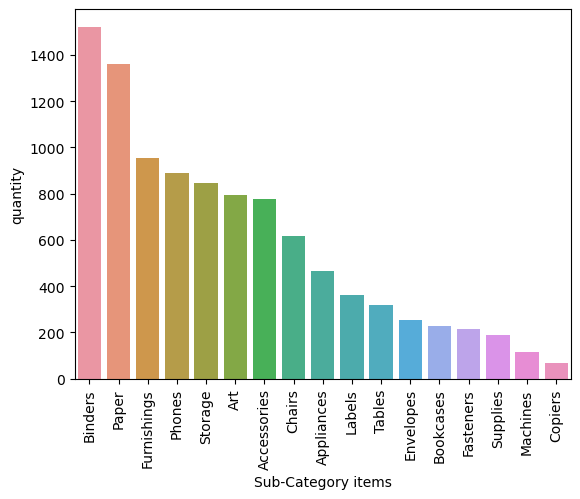

In [53]:
# Most product sold according to the above analysis is Binders and Papers
# lets represent it in graph 

sns.barplot(x='Sub-Category items', y='quantity',data = sub_category_item_sold.reset_index())
plt.xticks(rotation = 'vertical')


<Axes: xlabel='Sub-Category'>

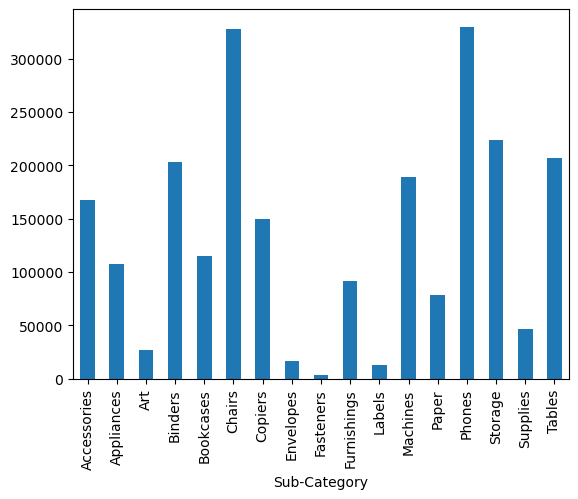

In [54]:
# Top product in sales 

df.groupby('Sub-Category')['Sales'].sum().plot.bar()

<Axes: xlabel='Sub-Category'>

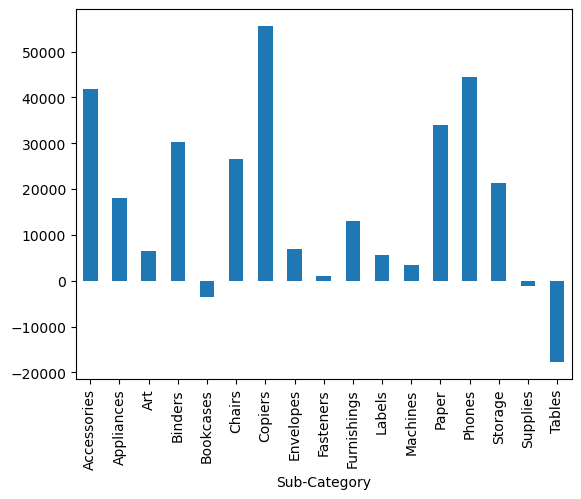

In [55]:
# now lwts see the top profitable product in the subcatehory items

df.groupby('Sub-Category')['Profit'].sum().plot.bar()

# we see that bookcases, Supplies and Tables are in loss 

Text(0, 0.5, 'Profit')

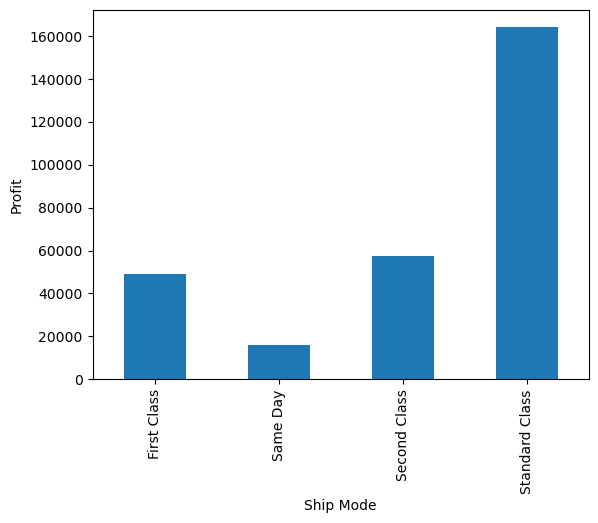

In [56]:
# Now lets analyse which segment mode & shipping mode showed more profit

df.groupby('Ship Mode')['Profit'].sum().plot.bar()
plt.ylabel('Profit')

<Axes: xlabel='Segment,Ship Mode'>

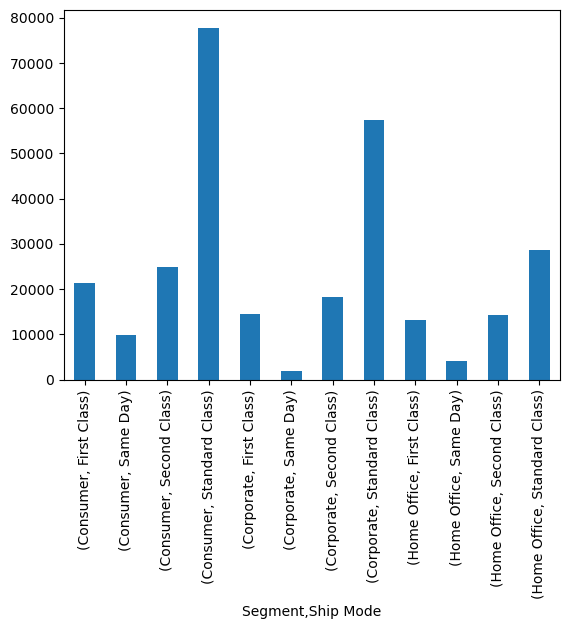

In [57]:
df.groupby(['Segment','Ship Mode'])['Profit'].sum().plot.bar()

In [58]:
'''
Clearly we can see there is some anomily in the dataset 
So there is more sales in the centeral region but less profit as compared to the south


'''

'\nClearly we can see there is some anomily in the dataset \nSo there is more sales in the centeral region but less profit as compared to the south\n\n\n'